- Fazer o membership do Abell 168 e 
- Salvar as figuras numa pasta à parte
- Precisa dos photo-zs do S-PLUS (arquivo que o Erik mandou) + dados do DECaLS pra poder fazer a separação estrela-galáxia 


- O Erik mandou uma tabela com os dados dos objetos dentro de 5R200 dos dois aglomerados ("A3128+3158.csv");
- Informações sobre os aglomerados, como raios etc., tão no arquivo "info_cls_shiftgap_iter_10.0hmpcf_nrb.csv"

### Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle
import astropy.units as u

from scipy.interpolate import interp1d

import os
import glob

/home/elismar/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/elismar/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=71, Om0=0.27, Tcmb0=2.725)

In [3]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc, rcParams
f = 0.8

fontsize = 35 * f
labelsize = 35 * f

rc("xtick", labelsize=fontsize * f)
rc("ytick", labelsize=fontsize * f)
rcParams["axes.linewidth"] = 5.3 * f
rcParams["xtick.major.width"] = 5.3 * f
rcParams["xtick.minor.width"] = 5.3 * f
rcParams["ytick.major.width"] = 5.3 * f
rcParams["ytick.minor.width"] = 5.3 * f
rcParams["xtick.major.size"] = 12.5 * f
rcParams["xtick.minor.size"] = 6.5 * f
rcParams["ytick.major.size"] = 12.5 * f
rcParams["ytick.minor.size"] = 6.5 * f

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50 * f,
        }


cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')
cm3 = plt.cm.get_cmap('gnuplot2')

color_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors1 = [cm1(value) for value in color_values]
colors3 = [cm3(value) for value in color_values]

## Familiarization with data

### Define cluster data

In [4]:
#Information based on the table of the paper draft (https://www.overleaf.com/4958173787sbwbtsgjzbch#c79586)

cl_names = np.array(["Abell 168", "MKW4"])
cl_ra = np.array([18.740487, 180.988406])
cl_dec = np.array([0.437564, 1.888278])
cl_z = np.array([0.044596, 0.02])
cl_radii_kpc = np.array([0.869956, 0.882308])*1000 #kpc

In [5]:
cl_radii_deg = []
for zi, i in zip(cl_z, range(len(cl_z))):
    kpc_scale = cosmo.kpc_proper_per_arcmin(z=zi).value/60.
    radius_deg = cl_radii_kpc[i] / (kpc_scale * 3600) #Convert radius from kpc to deg
    cl_radii_deg.append(radius_deg)
    
cl_radii_deg = np.asarray(cl_radii_deg)

In [6]:
cluster = 0

radius_cluster = cl_radii_deg[cluster]
z_cluster = cl_z[cluster]
ra0 = cl_ra[cluster]
dec0 = cl_dec[cluster]

### Legacy

In [ ]:
table_path_a168_legacy = "tables/A168+leg.parquet"
table_path_mkw4_legacy = "tables/mkw4.parquet"

In [ ]:
table_a168_legacy = pd.read_parquet(table_path_a168_legacy)
table_mkw4_legacy = pd.read_parquet(table_path_mkw4_legacy)

In [ ]:
table_mkw4_legacy.to_csv("tables/mkw4_legacy.csv", index=False)

In [8]:
table_a168_legacy = pd.read_csv("tables/A168_legacy.csv", usecols=["ra", "dec", "type", "mag_r"])
table_mkw4_legacy = pd.read_csv("tables/mkw4_legacy.csv", usecols=["ra", "dec", "type", "mag_r"])

In [9]:
ra_a168_legacy = table_a168_legacy["ra"]
dec_a168_legacy = table_a168_legacy["dec"]
type_a168_legacy = table_a168_legacy["type"]
mag_r_a168_legacy = table_a168_legacy["mag_r"]

ra_mkw4_legacy = table_mkw4_legacy["ra"]
dec_mkw4_legacy = table_mkw4_legacy["dec"]
type_mkw4_legacy = table_mkw4_legacy["type"]
mag_r_mkw4_legacy = table_mkw4_legacy["mag_r"]

In [10]:
mask_galaxies_a168 = (type_a168_legacy != "PSF") & (type_a168_legacy != "DUP")
mask_galaxies_mkw4 = (type_mkw4_legacy != "PSF") & (type_mkw4_legacy != "DUP")

/tmp/ipykernel_283836/48623749.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout(pad=3.0)
/home/elismar/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


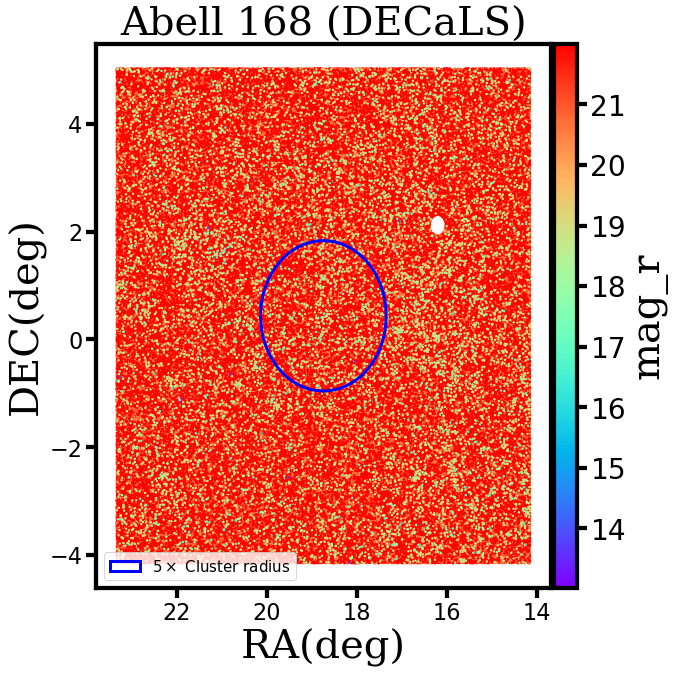

In [11]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)
sc1 = ax1.scatter(ra_a168_legacy[mask_galaxies_a168], dec_a168_legacy[mask_galaxies_a168], 
            marker='o', c=mag_r_a168_legacy[mask_galaxies_a168], cmap=cm2, s=2)
# ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title("Abell 168 (DECaLS)", fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="mag_r", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label=r"$5 \times$ Cluster radius", edgecolor="blue", facecolor="None")
ax1.add_patch(r)

ax1.legend(fontsize=15)

fig.tight_layout(pad=3.0)

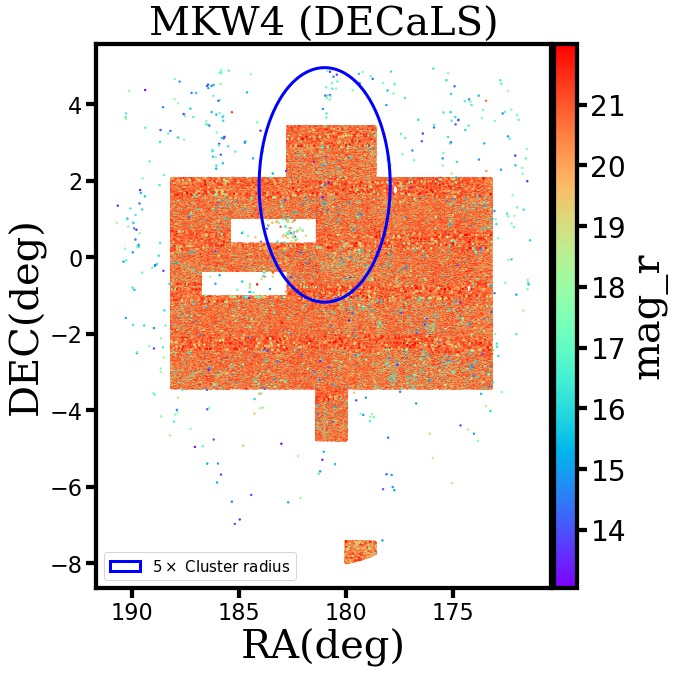

In [14]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)
sc1 = ax1.scatter(ra_mkw4_legacy[mask_galaxies_mkw4], dec_mkw4_legacy[mask_galaxies_mkw4], 
            marker='o', c=mag_r_mkw4_legacy[mask_galaxies_mkw4], cmap=cm2, s=2)
# ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title("MKW4 (DECaLS)", fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="mag_r", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label=r"$5 \times$ Cluster radius", edgecolor="blue", facecolor="None")
ax1.add_patch(r)

ax1.legend(fontsize=15)

fig.tight_layout(pad=3.0)

## S-PLUS

### Concatenating tables from Erik

In [ ]:
#Concatenate the data from the clusters that Erik sent
#There are tables that end with "_predicted" and others that don't. The second are the ones that contain information about the borders (I imagine this means that they have the flag to remove
#duplicated objects in the borders of S-PLUS)

fields_dir = "tables/mkw4/"
os.chdir(fields_dir)
cwd = os.getcwd()
fields = os.listdir(cwd)

os.chdir("../../")
os.getcwd()

In [ ]:
mask_fields = np.isin(glob.glob(fields_dir + "*.csv") , glob.glob(fields_dir + "*_predicted.csv"))

csv_files_predicted = glob.glob(fields_dir + "*_predicted.csv") 
df_list_predicted = (pd.read_csv(file) for file in csv_files_predicted)
big_df_predicted = pd.concat(df_list_predicted, ignore_index=True)

csv_files = np.array(glob.glob(fields_dir + "*.csv"))[~mask_fields].tolist()
df_list = (pd.read_csv(file) for file in csv_files)
big_df = pd.concat(df_list, ignore_index=True)

In [ ]:
big_df_predicted.to_csv("tables/mkw4_predicted.csv", index=False)
big_df.to_csv("tables/mkw4.csv", index=False)

### Loading tables

In [15]:
table_path_a168_splus = "tables/A168_splus_rPStotal.csv"

table_path_mkw4_splus = "tables/mkw4_splus_rPStotal.csv"

In [16]:
table_a168_splus = pd.read_csv(table_path_a168_splus, usecols=["ID", "RA", "DEC", "zml", "r_PStotal", "remove_flag"])

table_mkw4_splus = pd.read_csv(table_path_mkw4_splus, usecols=["ID", "RA", "DEC", "zml", "r_PStotal", "remove_flag"])

In [17]:
ra_a168_splus = table_a168_splus["RA"]
dec_a168_splus = table_a168_splus["DEC"]
zml_a168_splus = table_a168_splus["zml"]
rpstotal_a168_splus = table_a168_splus["r_PStotal"]
remove_flag_a168_splus = table_a168_splus["remove_flag"]

ra_mkw4_splus = table_mkw4_splus["RA"]
dec_mkw4_splus = table_mkw4_splus["DEC"]
zml_mkw4_splus = table_mkw4_splus["zml"]
rpstotal_mkw4_splus = table_mkw4_splus["r_PStotal"]
remove_flag_mkw4_splus = table_mkw4_splus["remove_flag"]

In [18]:
mask_splus_a168 = (remove_flag_a168_splus == False) & (rpstotal_a168_splus < 90)

mask_splus_mkw4 = (remove_flag_mkw4_splus == False) & (rpstotal_mkw4_splus < 90)

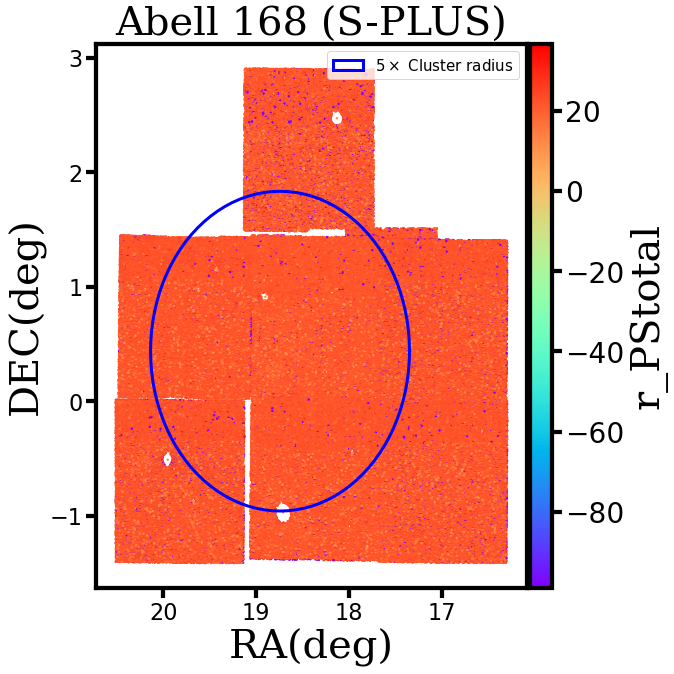

In [23]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)
sc1 = ax1.scatter(ra_a168_splus[mask_splus_a168], dec_a168_splus[mask_splus_a168], 
            marker='o', c=rpstotal_a168_splus[mask_splus_a168], cmap=cm2, s=2)
# ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title("Abell 168 (S-PLUS)", fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_PStotal", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label=r"$5 \times$ Cluster radius", edgecolor="blue", facecolor="None")
ax1.add_patch(r)

ax1.legend(fontsize=15)

fig.tight_layout(pad=3.0)

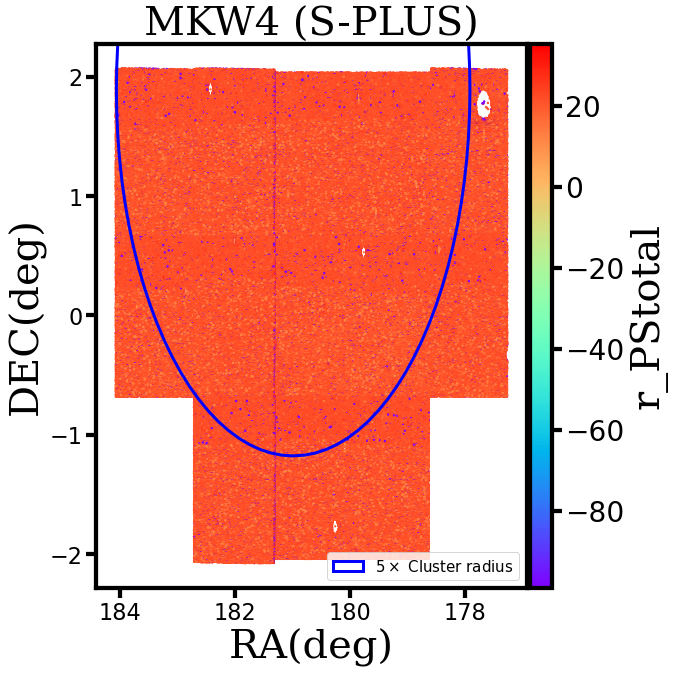

In [21]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)
sc1 = ax1.scatter(ra_mkw4_splus[mask_splus_mkw4], dec_mkw4_splus[mask_splus_mkw4], 
            marker='o', c=rpstotal_mkw4_splus[mask_splus_mkw4], cmap=cm2, s=2)
# ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title("MKW4 (S-PLUS)", fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_PStotal", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label=r"$5 \times$ Cluster radius", edgecolor="blue", facecolor="None")
ax1.add_patch(r)

ax1.legend(fontsize=15)

fig.tight_layout(pad=3.0)

I crossmatched S-PLUS and Legacy tables on TOPCAT, using 2 arcsecs for the crossmatch radius. Table names:

 - "a168_legacy_splus_rPStotal_crossmatch.csv"
 - "mkw4_legacy_splus_rPStotal_crossmatch.csv"
 
 We also have to do a crossmatch with the Spectroscopic_Catalogue (I used 2 arcsecs as well). Resulting table names:
 
 - "a168_legacy_splus_rPStotal_specz_crossmatch.csv"
 - "mkw4_legacy_splus_rPStotal_specz_crossmatch.csv"

In [7]:
#Por enquanto estou usando o r_aper_6, mas é porque só tenho r_aper_3 e r_aper_6 nessa tabela do A168.
col_names = ['ID', 'RA_1', 'DEC_1', 'zml', 'pdf_weights_0', 'pdf_weights_1', 'pdf_weights_2', 'pdf_means_0',
       'pdf_means_1', 'pdf_means_2', 'pdf_stds_0', 'pdf_stds_1', 'pdf_stds_2', 'r_PStotal']

In [8]:
if cl_names[cluster] == "Abell 168":
    t = pd.read_csv("tables/a168_legacy_splus_rPStotal_crossmatch.csv", usecols=col_names)
    t_specz = pd.read_csv("tables/a168_legacy_splus_rPStotal_specz_crossmatch.csv", usecols=col_names+["z"])
    
if cl_names[cluster] == "MKW4":
    t = pd.read_csv("tables/mkw4_legacy_splus_rPStotal_crossmatch.csv")
    t_specz = pd.read_csv("tables/mkw4_legacy_splus_rPStotal_specz_crossmatch.csv", usecols=col_names+["z"])

print("Loading data for cluster {}".format(cl_names[cluster]))
print("Cluster redshift: {:.2f}".format(z_cluster))
print("Cluster radius: {:.2f} Kpc".format(cl_radii_kpc[cluster]))
    
objid = np.asarray(t["ID"])
ra = np.asarray(t["RA_1"])
dec = np.asarray(t["DEC_1"])
zml = np.asarray(t["zml"])
pdf_weights = np.array([t[col_name] for col_name in ["pdf_weights_" + str(i) for i in range(0, 3)]])
pdf_means = np.array([t[col_name] for col_name in ["pdf_means_" + str(i) for i in range(0, 3)]])
pdf_stds = np.array([t[col_name] for col_name in ["pdf_stds_" + str(i) for i in range(0, 3)]])
rpstotal = np.asarray(t["r_PStotal"])

objid_specz = np.asarray(t_specz["ID"])
ra_specz = np.asarray(t_specz["RA_1"])
dec_specz = np.asarray(t_specz["DEC_1"])
zml_specz = np.asarray(t_specz["zml"])
pdf_weights_specz = np.array([t_specz[col_name] for col_name in ["pdf_weights_" + str(i) for i in range(0, 3)]])
pdf_means_specz = np.array([t_specz[col_name] for col_name in ["pdf_means_" + str(i) for i in range(0, 3)]])
pdf_stds_specz = np.array([t_specz[col_name] for col_name in ["pdf_stds_" + str(i) for i in range(0, 3)]])
rpstotal_specz = np.asarray(t_specz["r_PStotal"])
z = np.asarray(t_specz["z"])

Loading data for cluster Abell 168
Cluster redshift: 0.04
Cluster radius: 869.96 Kpc


## Perform the membership

[ 1.76886212e-04 -8.07438409e-03  1.23970821e-01 -6.33901493e-01]


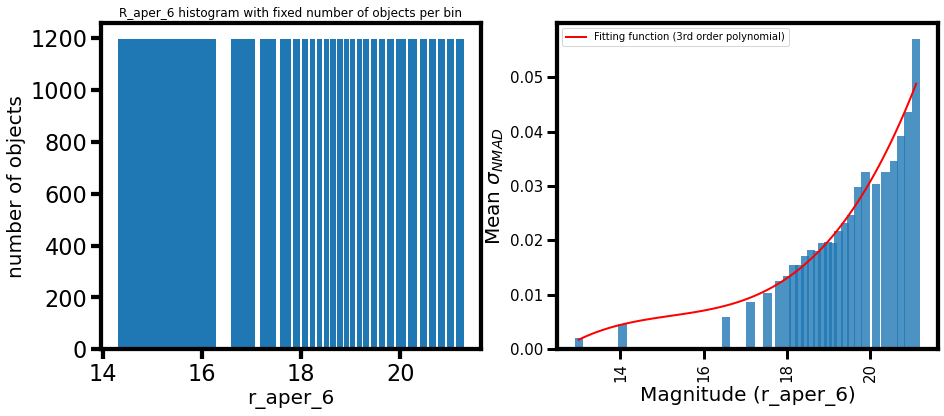

In [9]:
from galaxy_cluster_membership import *

In [10]:
#I define a range of spectroscopic redshifts previously to the application of the membership to diminish the numer
#of objects in the computation. We have to apply a safe margin to not eliminate potential cluster members

#redshift_range de 0.1 é o dobro do valor do sigma_nmad em magnitudes r ~21, então já tá mais que bom.

redshift_range = 0.7
mask_redshift = (zml > (z_cluster - redshift_range)) & (zml < (z_cluster + redshift_range))
mask_redshift_specz = (zml_specz > (z_cluster - redshift_range)) & (zml_specz < (z_cluster + redshift_range))


#Em alguns aglomerados dá pra definir desse jeito mais "automático", mas em alguns o sigma_clipping não funciona direito quando eu seto o z_lower e z_upper desse jeito.
#Por exemplo, pode ser que eu acabe selecionando um intervalo muito grande de redshifts e aí o sigma_clipping não funciona bem em alguns aglomerados
#Então nesses casos tenho que ajustar uns valores aqui à mão.
# z_lower = z_cluster-3*sigma
# z_upper = z_cluster+3*sigma

#Values for Abell 168
z_lower = 0.035
z_upper = 0.055

### Inspecting the clusters (spectroscopic)

In [11]:
sep_specz = clustercentric_distance(ra_specz[mask_redshift_specz], dec_specz[mask_redshift_specz], 
                                    ra0, dec0)

In [23]:
sigma_z_specz = np.array([sigma_nmad(r) for r in rpstotal_specz[mask_redshift_specz]])

#This mask defines all galaxies in the 5R200 projected area of the cluster
mask_cluster_region_specz = sep_specz < 5*radius_cluster

#This one restricts the above mask to only the galaxies delimited by +/-3*sigma from the cluster redshift, defining a list of candidate members
mask_cluster_specz = mask_cluster_region_specz & (zml_specz[mask_redshift_specz] > z_cluster - 3*sigma_z_specz) & (zml_specz[mask_redshift_specz] < z_cluster + 3*sigma_z_specz)

#This sigma_specz I apply to define the cluster's gaussian width in the membership method I think
sigma_z_specz = np.array([sigma_nmad(r) for r in rpstotal_specz[mask_redshift_specz][mask_cluster_specz]])
sigma_specz = np.median(sigma_z_specz)

# z_lower_specz = z_cluster-3*sigma_specz
# z_upper_specz = z_cluster+3*sigma_specz

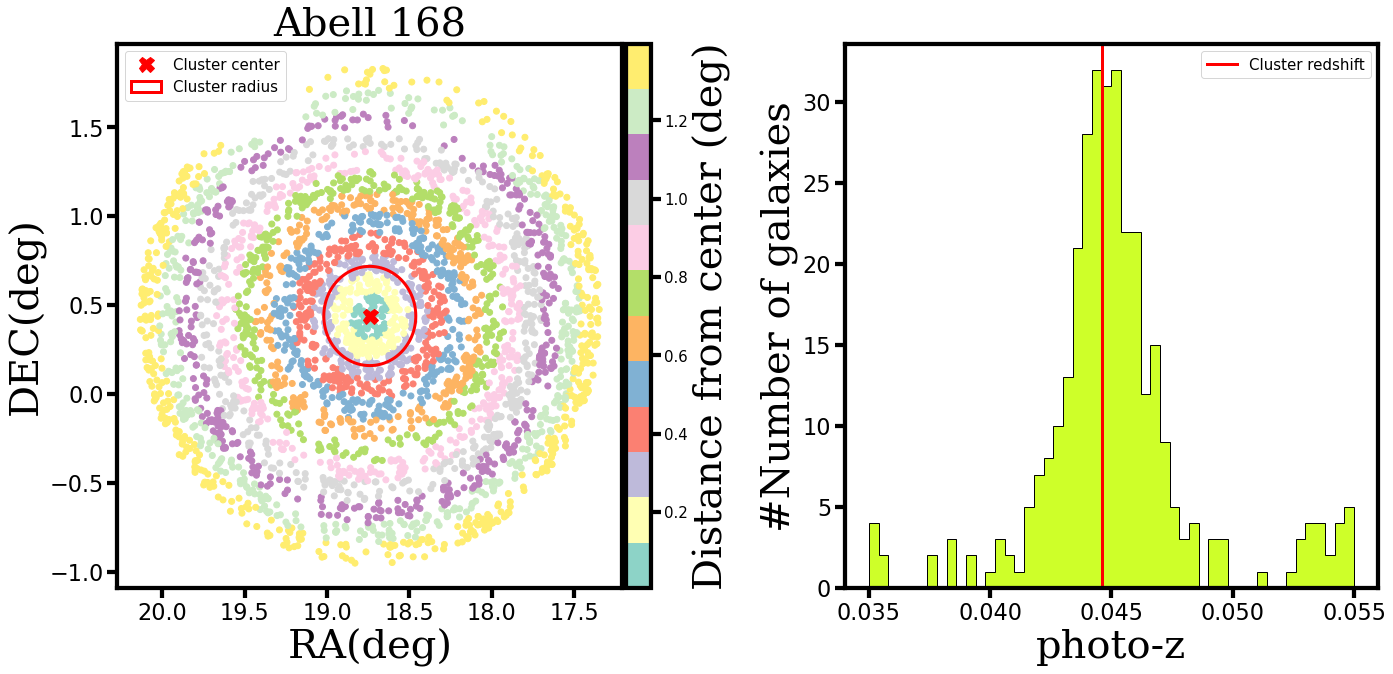

In [13]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
sc1 = ax1.scatter(ra_specz[mask_redshift_specz][mask_cluster_region_specz], 
                  dec_specz[mask_redshift_specz][mask_cluster_region_specz], 
                  marker='o', c=sep_specz[mask_cluster_region_specz], cmap=cm.Set3, rasterized=True)
ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title(cl_names[cluster], fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="Distance from center (deg)", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
ax1.add_patch(r)

ax1.legend(fontsize=labelsize)


ax2 = fig.add_subplot(122)
ax2.hist(z[mask_redshift_specz][mask_cluster_specz], bins=50, color=colors1[5], histtype='stepfilled', edgecolor='k', 
                 range=[z_lower, z_upper])
ax2.set_xlabel('photo-z',fontdict=font)
ax2.set_ylabel('#Number of galaxies',fontdict=font)
ax2.axvline(z_cluster, color="red", lw=3, label="Cluster redshift")

ax2.legend(fontsize=labelsize)


fig.tight_layout(pad=3.0)

# plt.savefig("../figures/clusters-membership/RA_DEC_z_distribution_{}.png".format(cl_names[cluster]), dpi='figure', format='png')

### Inspecting the clusters (photometric)

In [14]:
sep_all = clustercentric_distance(ra[mask_redshift], dec[mask_redshift], ra0, dec0)

In [15]:
sigma_z = np.array([sigma_nmad(r) for r in rpstotal[mask_redshift]])

#This mask defines all galaxies in the 5R200 projected area of the cluster
mask_cluster_region = sep_all < 5*radius_cluster

#This one restricts the above mask to only the galaxies delimited by +/-3*sigma from the cluster redshift, defining a list of candidate members
#For the sake of curiosity, these would be galaxies we would select for CHANCES with a 3*sigma_nmad criterium. 
mask_cluster = mask_cluster_region & (zml[mask_redshift] > z_cluster - 3*sigma_z) & (zml[mask_redshift] < z_cluster + 3*sigma_z)


# mask_cluster = sep_all < 5*radius_cluster
# sigma_z = np.array([sigma_nmad(r) for r in rpstotal[mask_redshift][mask_cluster]])
# sigma = np.median(sigma_z)

#Em alguns aglomerados dá pra definir desse jeito mais "automático", mas em alguns o sigma_clipping não funciona direito quando eu seto o z_lower e z_upper desse jeito.
#Por exemplo, pode ser que eu acabe selecionando um intervalo muito grande de redshifts e aí o sigma_clipping não funciona bem em alguns aglomerados
#Então nesses casos tenho que ajustar uns valores aqui à mão.
# z_lower = z_cluster-3*sigma
# z_upper = z_cluster+3*sigma

# z_lower = 0.035
# z_upper = 0.055

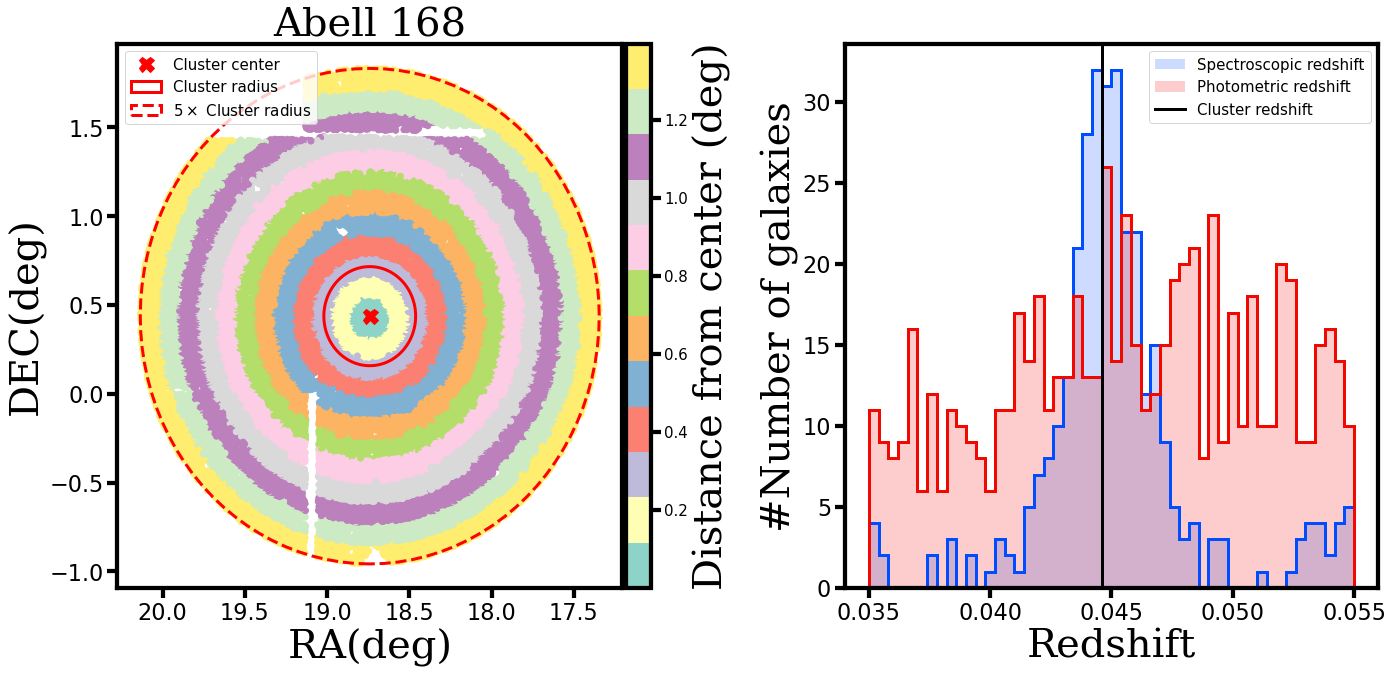

In [16]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
sc1 = ax1.scatter(ra[mask_redshift][mask_cluster_region], dec[mask_redshift][mask_cluster_region], 
            marker='o', c=sep_all[mask_cluster_region], cmap=cm.Set3, rasterized=True)
ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title(cl_names[cluster], fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="Distance from center (deg)", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
ax1.add_patch(r1)
ax1.add_patch(r5)

ax1.legend(fontsize=15)


ax2 = fig.add_subplot(122)
ax2.hist(z[mask_redshift_specz][mask_cluster_specz], bins=50, color=colors1[1], histtype='stepfilled',
                 range=[z_lower, z_upper], alpha=0.2, label="Spectroscopic redshift")
ax2.hist(z[mask_redshift_specz][mask_cluster_specz], bins=50, color=colors1[1], histtype='step', lw=3.0,
                 range=[z_lower, z_upper])

ax2.hist(zml[mask_redshift][mask_cluster], bins=50, color=colors1[8], histtype='stepfilled',
                 range=[z_lower, z_upper], alpha=0.2, label="Photometric redshift")
ax2.hist(zml[mask_redshift][mask_cluster], bins=50, color=colors1[8], histtype='step', lw=3.0,
                 range=[z_lower, z_upper])

ax2.set_xlabel('Redshift',fontdict=font)
ax2.set_ylabel('#Number of galaxies',fontdict=font)
ax2.axvline(z_cluster, color="black", lw=3, label="Cluster redshift")

ax2.legend(fontsize=15)


fig.tight_layout(pad=3.0)

# plt.savefig("../figures/clusters-membership/RA_DEC_zml_distribution_{}.png".format(cl_names[cluster]), dpi='figure', format='png')

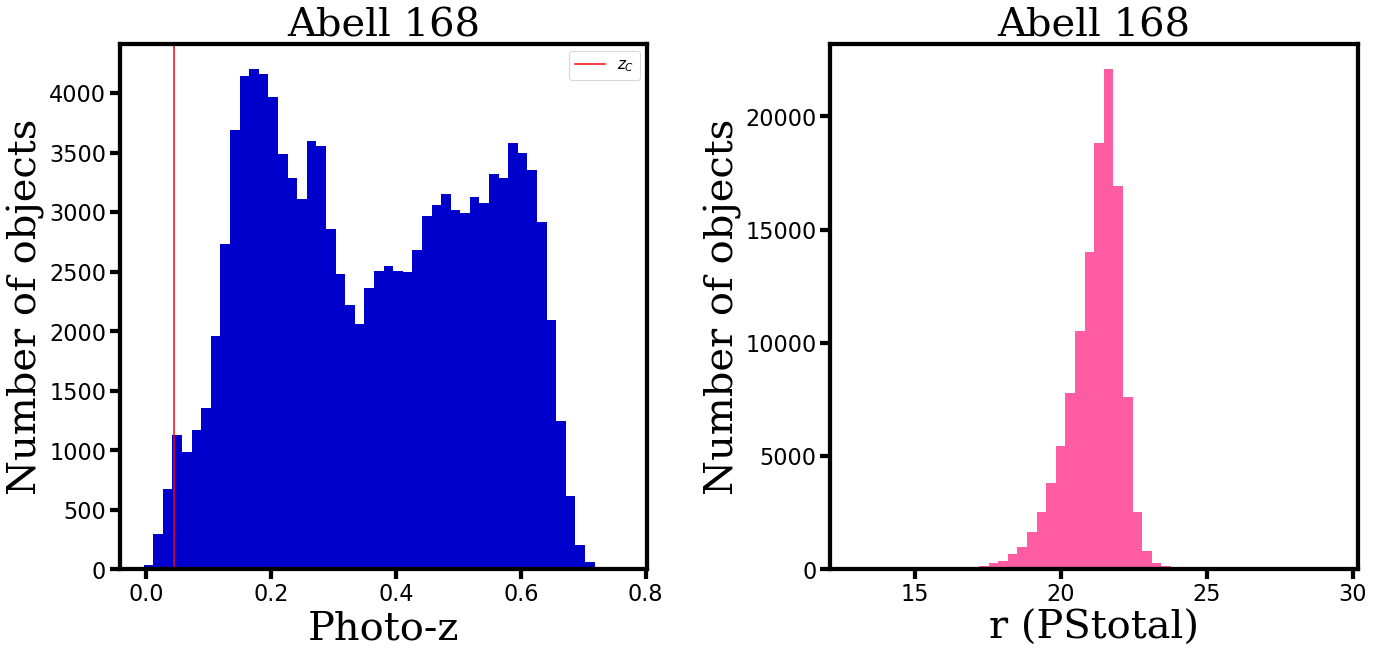

In [17]:
bins = 50

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax1.hist(zml, alpha=1.0, bins=bins, histtype='stepfilled', color=colors3[1])
ax1.set_title(cl_names[cluster], fontdict=font)
ax1.set_xlabel("Photo-z", fontdict=font)
ax1.set_ylabel("Number of objects", fontdict=font)
ax1.axvline(z_cluster, color="red", label=r"$z_C$")
ax1.legend(fontsize=15)


ax2 = fig.add_subplot(122)
ax2.hist(rpstotal, alpha=1.0, bins=bins, histtype='stepfilled', color=colors3[5])
ax2.set_title(cl_names[cluster], fontdict=font)
ax2.set_xlabel("r (PStotal)", fontdict=font)
ax2.set_ylabel("Number of objects", fontdict=font)

fig.tight_layout(pad=4.0)

# plt.savefig("../figures/clusters-membership/photoz_rPStotal_distributions_{}.png".format(cl_names[cluster]), dpi='figure', format='png')

#### O valor máximo no qual os photo-zs são bons, de acordo com o próprio Erik, é ~0.7
- Isso significa que eu só devo usar galáxias até mais ou menos 0.7 em photo-z
- E principalmente, que eu só vou definir o volume do campo até photo-z 0.7

### Calculate priors -- George+11 method

 - We start by dividing the galaxies into bins of redshift and magnitude, and then excluding galaxies in the volume defined by $3 R_{200}$ and $z_G \pm 5 \sigma_{\mathcal{P}}(\bar{m})$

 - Since I am considering this new method of calculating membership probabilities, I will have to adapt the next cell to consider a different value of prior for each magnitude interval, from 13 to 22.
 - Also, I will run this considering as candidate cluster members only galaxies in the volume $r_c < 3R_{200}$ and $z_c - 5 \sigma < z_p < z_c + 5 \sigma$, which is the same that George+2011 considered in their paper.

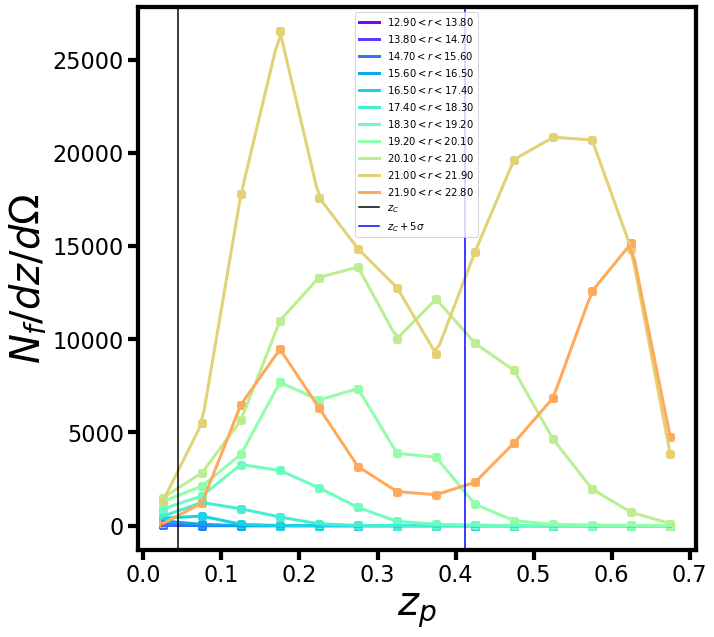

In [35]:
priors = priors_george11(rpstotal[mask_redshift], zml[mask_redshift], sep_all, z_cluster, radius_cluster, plot=True)

In [ ]:
#For the priors computed in this way, we consider a small volume for the cluster
sigma_max = sigma_nmad(r_max)
mask_cluster_specz_smaller = (sep_specz < radius_cluster) & (zml_specz > z_cluster - 3*sigma_max) & (zml_specz < z_cluster + 3*sigma_max)

In [ ]:
rmags = rpstotal_specz[mask_redshift_specz][mask_cluster_specz_smaller]
Pmem = np.array([])

for r in np.arange(r_min, r_max, dr):
    
    mask_r = (rmags > r) & (rmags < r+dr)
    
    P_ginF = priors["{:.2f} < r < {:.2f}".format(r, r+dr)]
    P_ginG = 1 - P_ginF
    
    Pmem = np.concatenate((Pmem, (P_pz_G_i_array[mask_r] * P_ginG) / (P_pz_G_i_array[mask_r] * P_ginG + P_pz_F_i_array[mask_r] * P_ginF)))

### Compute priors using spectroscopic members and non-members as estimates of the number of field and cluster galaxies

$$P( g \in C) = \frac{\text{Number of spectroscopic members in the volume of the cluster}}{\text{Total number of galaxies in the volume of the cluster}}$$

In [18]:
z_members, id_members = sigma_clipping(z[mask_redshift_specz][mask_cluster_specz], objid_specz[mask_redshift_specz][mask_cluster_specz], z_lower, z_upper, 3.0)
mask_members = np.isin(objid_specz[mask_redshift_specz][mask_cluster_specz], id_members)

In [44]:
P_ginG = np.sum(mask_members) / np.sum(mask_cluster_specz)
P_ginF = 1 - P_ginG

print("P (g in C) = {:.3f}".format(P_ginG))
print("P (g in F) = {:.3f}".format(P_ginF))

P (g in C) = 0.347
P (g in F) = 0.653


### Compute membership probabilities for spectroscopic members to estimate purity and completeness

In [41]:
P_pz_G_i_array = np.zeros(len(zml_specz[mask_redshift_specz][mask_cluster_specz]))
P_pz_F_i_array = np.zeros(len(zml_specz[mask_redshift_specz][mask_cluster_specz]))

for i in range(len(zml_specz[mask_redshift_specz][mask_cluster_specz])):  
    P_pz_G_i, P_pz_F_i = P_pz(i, z_cluster, pdf_means_specz.T[mask_redshift_specz][mask_cluster_specz], 
                              pdf_weights_specz.T[mask_redshift_specz][mask_cluster_specz],
                              pdf_stds_specz.T[mask_redshift_specz][mask_cluster_specz], sigma_specz)
    P_pz_G_i_array[i] = P_pz_G_i
    P_pz_F_i_array[i] = P_pz_F_i

/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  a = 1 / integrate.quad(pdfs_interp, 0.0, 1.0)[0]
/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:228: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  P_pz_G = integrate.quad(lambda x, sigma, zagl: pdf_func(x) * gaussian(x, zagl, sigma), 0.0, zagl + 3*sigma, args=(sigma, zagl))[0]
/work/Doc/galaxy-cluster-membership/galaxy_cluster_me

In [45]:
Pmem = (P_pz_G_i_array * P_ginG) / (P_pz_G_i_array * P_ginG + P_pz_F_i_array * P_ginF)

In [46]:
z_members, id_members = sigma_clipping(z[mask_redshift_specz][mask_cluster_specz], objid_specz[mask_redshift_specz][mask_cluster_specz], z_lower, z_upper, 3.0)
mask_members = np.isin(objid_specz[mask_redshift_specz][mask_cluster_specz], id_members)

In [47]:
completeness = []
purity = []
d = 0.01
crit = np.arange(0.0, 1.0, d)

for c in crit:
    completeness.append(np.sum((Pmem > c) & mask_members) / np.sum(mask_members))
    purity.append(np.sum(mask_members & (Pmem > c)) / np.sum((Pmem > c)))

/tmp/ipykernel_3711/1530194130.py:8: RuntimeWarning: invalid value encountered in long_scalars
  purity.append(np.sum(mask_members & (Pmem > c)) / np.sum((Pmem > c)))


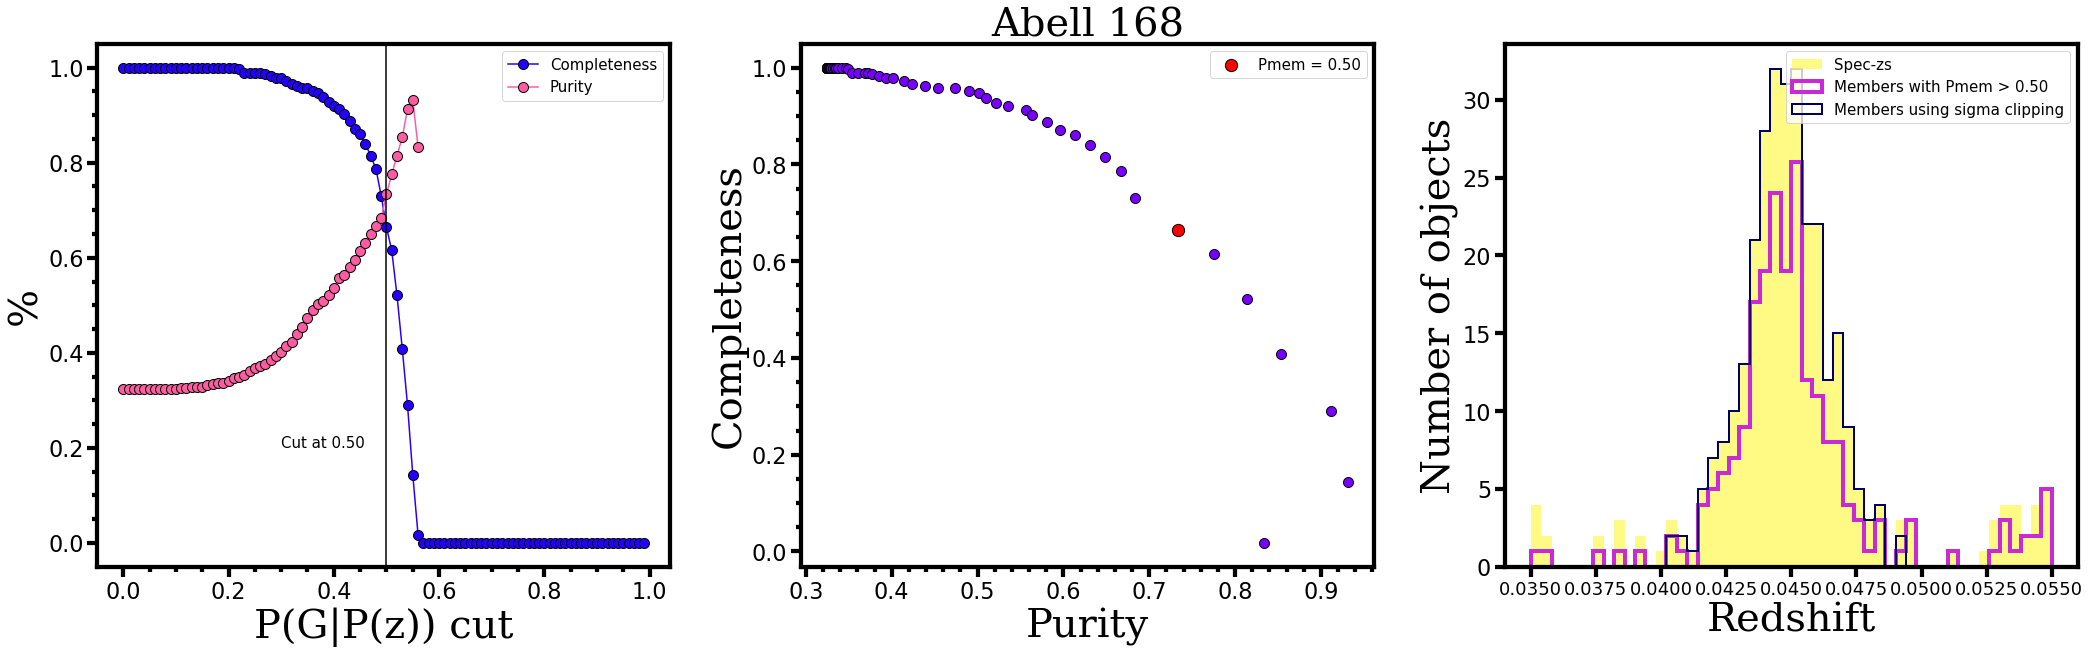

In [49]:
fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(131)
ms = 10
ax1.plot(crit, completeness, marker='o', color=colors3[2], 
         label="Completeness", markersize=ms, markeredgecolor="black")
ax1.plot(crit, purity, marker='o', color=colors3[5], 
         label="Purity", markersize=ms, markeredgecolor="black")

ax1.set_ylabel("%", fontdict=font)
ax1.set_xlabel("P(G|P(z)) cut", fontdict=font)
ax1.minorticks_on()

lg=plt.legend(fontsize=15)
lg.draw_frame(True)

cut = 0.50
ax1.axvline(cut, color="black")
ax1.text(x=cut-0.2, y=0.2, s="Cut at {:.2f}".format(cut), fontsize=15)
# ax1.text(x=0.03, y=0.8, s="P(g in F) = {:.2f}".format(P_ginF), fontsize=15)
# ax1.text(x=0.03, y=0.75, s="P(g in C) = {:.2f}".format(P_ginG), fontsize=15)

ax2 = fig.add_subplot(132)
ax2.scatter(purity, completeness, marker='o', color=colors3[3], s=100, edgecolor="black")

ax2.scatter(purity[np.argwhere(np.abs(crit - cut) == np.abs(crit - cut).min())[0][0]], completeness[np.argwhere(np.abs(crit - cut) == np.abs(crit - cut).min())[0][0]],
            marker='o', color="red", s=150, edgecolor="black", label="Pmem = {:.2f}".format(cut))

ax2.set_ylabel("Completeness", fontdict=font)
ax2.set_xlabel("Purity", fontdict=font)
ax2.set_title(cl_names[cluster], fontdict=font)
ax2.minorticks_on()

lg=plt.legend(fontsize=15)
lg.draw_frame(True)



ax3 = fig.add_subplot(133)
bins = 50
ax3.hist(z[mask_redshift_specz][mask_cluster_specz], alpha=0.5, label='Spec-zs', bins=bins, range=(z_lower, z_upper), 
        histtype='stepfilled', color=colors3[8])
ax3.hist(z[mask_redshift_specz][mask_cluster_specz][Pmem > cut], alpha=1.0, label='Members with Pmem > {:.2f}'.format(cut), 
        bins=bins, range=(z_lower, z_upper), histtype='step', lw=4, color=colors3[4])
ax3.hist(z_members, alpha=1.0, label='Members using sigma clipping'.format(cut), bins=bins, range=(z_lower, z_upper), 
        histtype='step', lw=2, color=colors3[0])

ax3.set_xlabel("Redshift", fontdict=font)
ax3.set_ylabel("Number of objects", fontdict=font)

ax3.tick_params(axis='x', labelsize=18)

lg=plt.legend(fontsize=15)
lg.draw_frame(True)

fig.tight_layout(pad=4.0)

plt.savefig("../figures/clusters-membership/purity_completeness_1R200_george+11-priors_{}.png".format(cl_names[cluster]), dpi='figure', format='png')

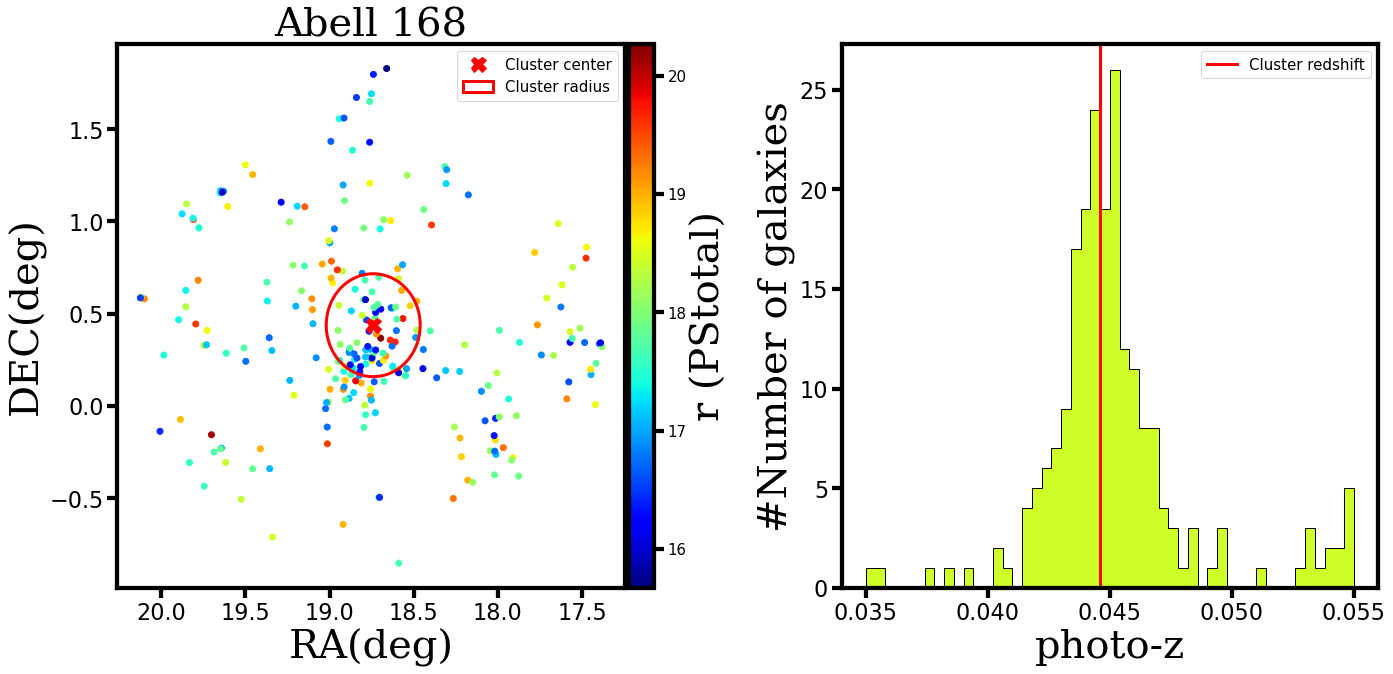

In [54]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
sc1 = ax1.scatter(ra_specz[mask_redshift_specz][mask_cluster_specz][Pmem > cut], 
                  dec_specz[mask_redshift_specz][mask_cluster_specz][Pmem > cut], 
                  marker='o', c=rpstotal_specz[mask_redshift_specz][mask_cluster_specz][Pmem > cut], cmap="jet", rasterized=True)
ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title(cl_names[cluster], fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r (PStotal)", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
ax1.add_patch(r)

ax1.legend(fontsize=labelsize)


ax2 = fig.add_subplot(122)
ax2.hist(z[mask_redshift_specz][mask_cluster_specz][Pmem > cut], bins=50, color=colors1[5], histtype='stepfilled', edgecolor='k', 
                 range=[z_lower, z_upper])
ax2.set_xlabel('photo-z',fontdict=font)
ax2.set_ylabel('#Number of galaxies',fontdict=font)
ax2.axvline(z_cluster, color="red", lw=3, label="Cluster redshift")

ax2.legend(fontsize=labelsize)


fig.tight_layout(pad=3.0)

# plt.savefig("../figures/clusters-membership/RA_DEC_z_distribution_{}.png".format(cl_names[cluster]), dpi='figure', format='png')

In [ ]:
np.save("clusters-membership/Pmem_specz_{}".format(cl_names[cluster]), Pmem)

## Apply membership to all galaxies

Os erros estão muito grandes, e eu acabo selecionando membros em um intervalo muito grande de photo-zs...

In [ ]:
Pmem = np.zeros(len(zml[mask_redshift][mask_cluster]))
for i in range(len(zml[mask_redshift][mask_cluster])):  
    P_pz_G_i, P_pz_F_i = P_pz(i, z_cluster, pdf_means.T[mask_redshift][mask_cluster], 
                              pdf_weights.T[mask_redshift][mask_cluster],
                              pdf_stds.T[mask_redshift][mask_cluster], sigma)
    Pmem[i] = (P_pz_G_i * P_ginG) / (P_pz_G_i * P_ginG + P_pz_F_i * P_ginF)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

bins = 50
ax.hist(zml[mask_redshift][mask_cluster], alpha=0.5, label='Spec-zs', bins=bins, range=(z_lower, z_upper), 
        histtype='stepfilled', color=colors3[0])
ax.hist(zml[mask_redshift][mask_cluster][Pmem > cut], alpha=1.0, label='Members with Pmem > {:.2f}'.format(cut), 
        bins=bins, range=(z_lower, z_upper), histtype='step', lw=4, color=colors3[4])

ax.set_title(cl_names[cluster], fontdict=font)
ax.set_xlabel("Photo-z", fontdict=font)
ax.set_ylabel("Number of objects", fontdict=font)

lg=plt.legend(fontsize=15)
lg.draw_frame(True)

# plt.savefig("figures/photoz_distribution_membership_{}.png".format(cl_names[cluster]), dpi='figure', format='png')

In [ ]:
final_cluster_table = t.loc[np.isin(objid, objid[mask_redshift][mask_cluster])]
final_cluster_table["Pmem"] = Pmem
final_cluster_table.to_csv("clusters-membership/table_membership_{}.csv".format(cl_names[cluster]), index=False)

### Applying the membership to A168 with photo-zs calculated with PSTotal and ISO apertures